# Spotify Data analysis 1921-2020, 160k+ Tracks 

As a self-taught data scientist and music enthusiast, I always wanted to do some scientific research using Spotify Web API. Later as I found out that there was no up-to-date and large-scale dataset, I decided to create it on my own.

The "data.csv" file contains more than 160.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

In [2]:
project_name = "Spotify-Data-analysis"

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project="Spotify-Data-analysis")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suhasyogeesh/spotify-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suhasyogeesh/spotify-data-analysis


'https://jovian.ml/suhasyogeesh/spotify-data-analysis'

## Data Preparation and Cleaning

As the data set contain vast ammount of information , we are going to import the libraries we will use in the notebook and read the data m, handle the null values and understand the data so that we can analyze the data further.

In [6]:
#Installing the upgraded version of all libraries
!pip install numpy pandas matplotlib seaborn --upgrade --quiet

In [7]:
## here we are importing all the libraries we are going to use in this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Reading the matches.csv into matches_df dataframe
spotify_df= pd.read_csv('data.csv')

In [9]:
spotify_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [10]:
#Getting the information about the songs dataframe
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [11]:
#Finding the shape of the spotify dataframe
spotify_df.shape

(169909, 19)

In [12]:
#Finding the columns of spotify dataframe
spotify_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [13]:
spotify_df[['artists','name','year']].head(10)

,artists,name,year
0,['Carl Woitschach'],Singende Bataillone 1. Teil,1928
1,"['Robert Schumann', 'Vladimir Horowitz']","Fantasiestücke, Op. 111: Più tosto lento",1928
2,['Seweryn Goszczyński'],Chapter 1.18 - Zamek kaniowski,1928
3,['Francisco Canaro'],Bebamos Juntos - Instrumental (Remasterizado),1928
4,"['Frédéric Chopin', 'Vladimir Horowitz']","Polonaise-Fantaisie in A-Flat Major, Op. 61",1928
5,"['Felix Mendelssohn', 'Vladimir Horowitz']",Scherzo a capriccio: Presto,1928
6,"['Franz Liszt', 'Vladimir Horowitz']","Valse oubliée No. 1 in F-Sharp Major, S. 215/1",1928
7,['Carl Woitschach'],Per aspera ad astra,1928
8,"['Francisco Canaro', 'Charlo']",Moneda Corriente - Remasterizado,1928
9,['Seweryn Goszczyński'],Chapter 1.3 - Zamek kaniowski,1928


In [14]:
spotify_df[['artists','name','year']].tail(10)

,artists,name,year
169899,['YoungBoy Never Broke Again'],Rough Ryder,2020
169900,['Kelly Clarkson'],I Dare You,2020
169901,"['Meek Mill', 'Roddy Ricch']",Letter To Nipsey (feat. Roddy Ricch),2020
169902,"['Trey Songz', 'Summer Walker']",Back Home (feat. Summer Walker),2020
169903,"['LEGADO 7', 'Junior H']",Ojos De Maniaco,2020
169904,"['DripReport', 'Tyga']",Skechers (feat. Tyga) - Remix,2020
169905,"['Leon Bridges', 'Terrace Martin']",Sweeter (feat. Terrace Martin),2020
169906,"['Kygo', 'Oh Wonder']",How Would I Know,2020
169907,"['Cash Cash', 'Andy Grammer']",I Found You,2020
169908,['Ingrid Andress'],More Hearts Than Mine,2020


In [15]:
## let find the nunique values in the data frame,it ignores the nan values


spotify_df.nunique()


acousticness          4714
artists              33375
danceability          1232
duration_ms          50212
energy                2332
explicit                 2
id                  169909
instrumentalness      5401
key                     12
liveness              1741
loudness             25313
mode                     2
name                132940
popularity             100
release_date         10882
speechiness           1628
tempo                84548
valence               1739
year                   100
dtype: int64

In [16]:
## We check for Null values using isnull() function

spotify_df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

<AxesSubplot:>

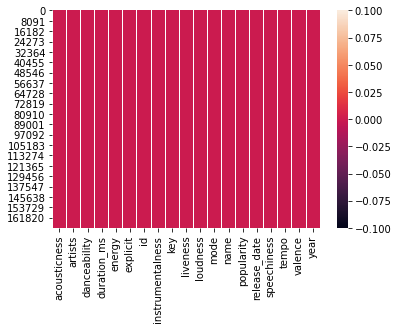

In [17]:
## this is the visual representation of above

sns.heatmap(spotify_df.isnull())

In [18]:
## we see that there are null values in the columns director,cast,country,date added and rating.Lets deal with these . 
## creating copy so that the original is intact

sf_df=spotify_df.copy()

In [19]:
sf_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [20]:
sf_df.drop(['danceability','energy','instrumentalness','id','loudness','liveness'],axis=1,inplace=True)

sf_df

,acousticness,artists,duration_ms,explicit,key,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],158648,0,10,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",282133,0,8,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],104300,0,5,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],180760,0,1,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",687733,0,11,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",163800,1,1,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",167468,0,8,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",180700,0,7,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",167308,0,1,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [21]:
jovian.commit(project='Spotify-Data-analysis', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suhasyogeesh/spotify-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/suhasyogeesh/spotify-data-analysis


'https://jovian.ml/suhasyogeesh/spotify-data-analysis'

## Exploratory Analysis and Visualization
In this section we ask interesting questions to analyze the data and draw some conclusions based on the analysis.

Q1:How many songs composed by each artists ?

In [33]:
## Lets find how may songs composed by each artist
##value_count() Return a Series containing counts of unique values.

sf_df['artists'].value_counts()

['Эрнест Хемингуэй']                                1215
['Francisco Canaro']                                 938
['Эрих Мария Ремарк']                                781
['Ignacio Corsini']                                  620
['Frank Sinatra']                                    592
                                                    ... 
['Hayden James']                                       1
['ILLENIUM', "Liam O'Donnell", 'T-Mass', 'LZRD']       1
['Yo-Yo Ma', 'Patricia Zander']                        1
['Bebe Rexha', 'Nicki Minaj']                          1
['Jean-Marie Amato']                                   1
Name: artists, Length: 33375, dtype: int64

Q2:Which are the songs with hishest tempo of the songs in the data frame.

In [42]:
## lets get the songs with heighest tempo , we use groupby() ,count() and sort_values() to get the result
## Groupby() This can be used to group large amounts of data and compute operations on these groups.
## count() counts the number of values in each column.
## sort_values() Sort by the values along either axis

toptempo_songs = sf_df.groupby('artists').count().sort_values('tempo',ascending=False)

toptempo_songs.reset_index(inplace=True)

toptempo_songs


,artists,acousticness,duration_ms,explicit,key,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,['Эрнест Хемингуэй'],1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215
1,['Francisco Canaro'],938,938,938,938,938,938,938,938,938,938,938,938
2,['Эрих Мария Ремарк'],781,781,781,781,781,781,781,781,781,781,781,781
3,['Ignacio Corsini'],620,620,620,620,620,620,620,620,620,620,620,620
4,['Frank Sinatra'],592,592,592,592,592,592,592,592,592,592,592,592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33370,['Jason Boland'],1,1,1,1,1,1,1,1,1,1,1,1
33371,"['Jason Aldean', 'Miranda Lambert']",1,1,1,1,1,1,1,1,1,1,1,1
33372,"['Jason Aldean', 'Luke Bryan', 'Eric Church']",1,1,1,1,1,1,1,1,1,1,1,1
33373,"['Jason Aldean', 'Ludacris']",1,1,1,1,1,1,1,1,1,1,1,1


C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


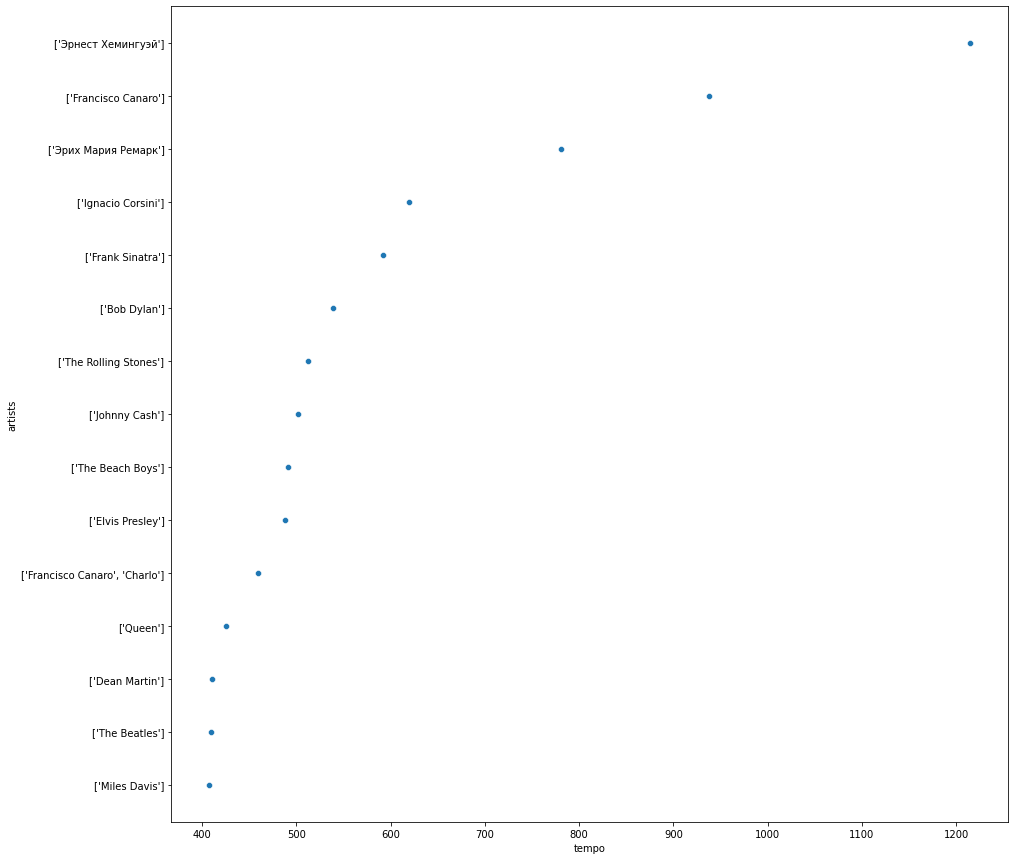

In [55]:
plt.figure(figsize=(15, 15))

sns.scatterplot(toptempo_songs.tempo,toptempo_songs.artists.head(15));

Q3 What are the most common popularity of the songs in the dataset

,popularity,name
0,0,27357
1,42,3280
2,43,3120
3,40,3061
4,44,3054
...,...,...
95,93,3
96,97,1
97,96,1
98,99,1


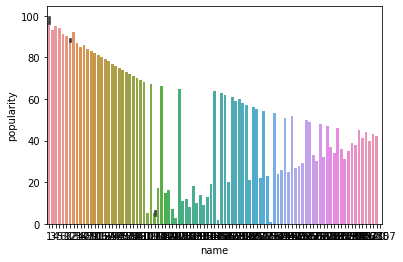

In [46]:
## below is the depiction of the most common popularity which is TV_MA in this case

sf_df_popularity = sf_df['popularity'].value_counts()
sf_df_popularity = pd.DataFrame(sf_df_popularity).reset_index()
sf_df_popularity.columns = ['popularity','name']
sns.barplot(y = 'popularity',x = 'name', data=sf_df_popularity)
sf_df_popularity

#note: Every song name cannot be displayed precisely 

Q4:What are the top 10 populated songs ?

In [54]:
top_listed=sf_df["name"].value_counts()
top_listed.head(10)

Summertime    62
Overture      43
Home          40
Stay          34
You           33
Forever       32
I Love You    32
Heaven        31
Paradise      31
Angel         31
Name: name, dtype: int64

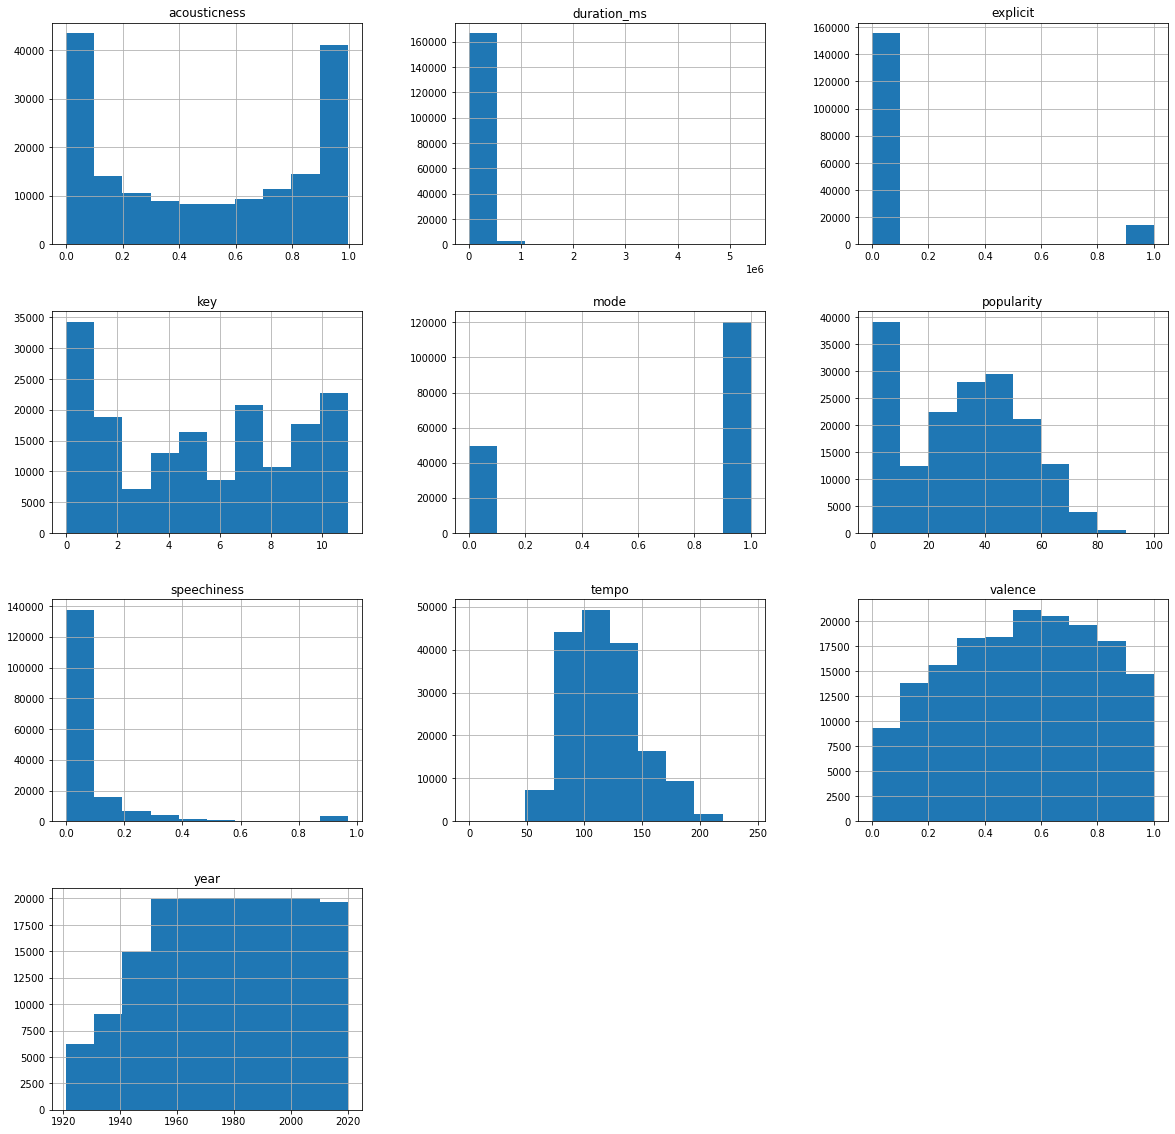

In [56]:
sf_df.hist(figsize=(20, 20))
plt.show()

<AxesSubplot:>

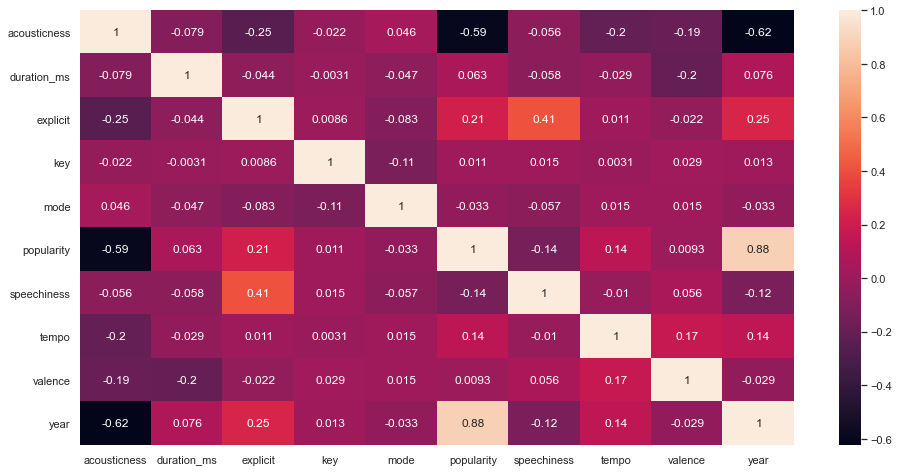

In [57]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = sf_df.corr()
sns.heatmap(corr,annot=True)

Visualization of the dataset by different plots.

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='liveness', ylabel='Density'>

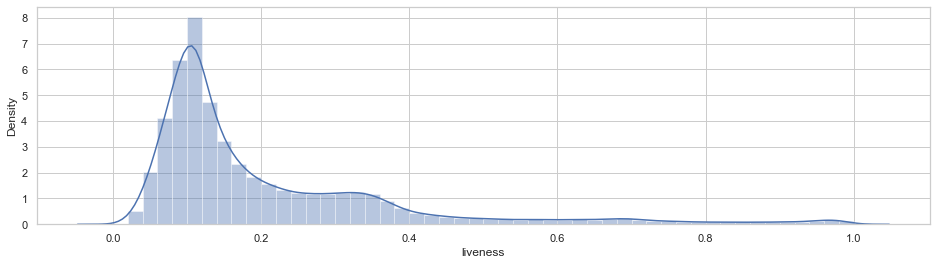

In [60]:
plt.figure(figsize=(16, 4))
sns.distplot(spotify_df["liveness"])

It's time to find out which is the popular song and the artist also.

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'death bed (coffee for your head) (feat. beabadoobee)'),
  Text(1, 0, 'Supalonely'),
  Text(2, 0, 'ily (i love you baby) (feat. Emilee)'),
  Text(3, 0, 'Stuck with U (with Justin Bieber)'),
  Text(4, 0, 'GOOBA'),
  Text(5, 0, 'Tusa'),
  Text(6, 0, 'SICKO MODE'),
  Text(7, 0, 'Yo Perreo Sola'),
  Text(8, 0, 'Breaking Me'),
  Text(9, 0, 'Safaera'),
  Text(10, 0, 'ROXANNE'),
  Text(11, 0, 'Savage Remix (feat. Beyoncé)'),
  Text(12, 0, 'Boss Bitch'),
  Text(13, 0, 'WHATS POPPIN'),
  Text(14, 0, 'bad guy'),
  Text(15, 0, "Don't Start Now"),
  Text(16, 0, 'Be Kind (with Halsey)'),
  Text(17, 0, 'Play Date'),
  Text(18, 0, 'Rain On Me (with Ariana Grande)'),
  Text(19, 0, 'Intentions')])

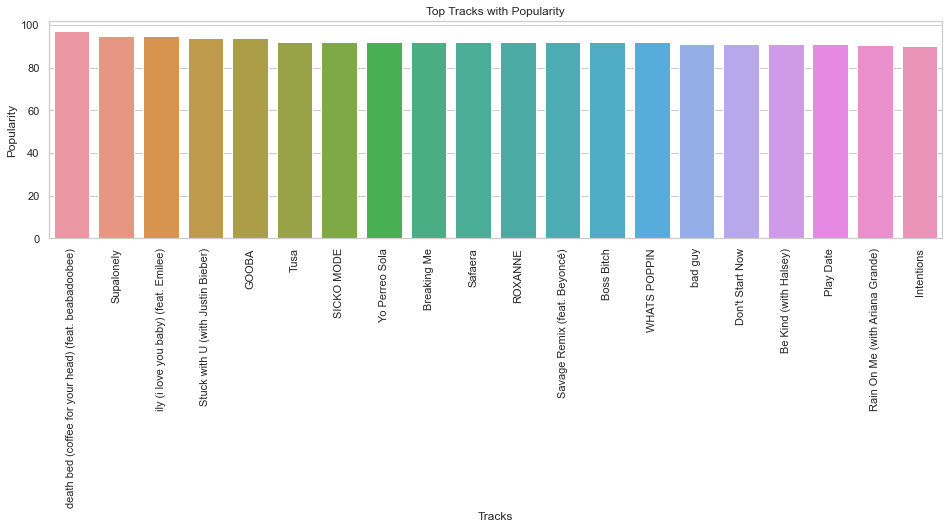

In [61]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = spotify_df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x)
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

As we see death bed has great popularity by this graph.

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, "['The Beatles']"),
  Text(1, 0, "['The Rolling Stones']"),
  Text(2, 0, "['Bob Dylan']"),
  Text(3, 0, "['Elvis Presley']"),
  Text(4, 0, "['Frank Sinatra']"),
  Text(5, 0, "['Led Zeppelin']"),
  Text(6, 0, "['Fleetwood Mac']"),
  Text(7, 0, "['Queen']"),
  Text(8, 0, "['The Beach Boys']"),
  Text(9, 0, "['Johnny Cash']"),
  Text(10, 0, "['Bob Marley & The Wailers']"),
  Text(11, 0, "['Taylor Swift']"),
  Text(12, 0, "['Red Hot Chili Peppers']"),
  Text(13, 0, "['Elton John']"),
  Text(14, 0, "['Eminem']"),
  Text(15, 0, "['Metallica']"),
  Text(16, 0, "['Pink Floyd']"),
  Text(17, 0, "['Miles Davis']"),
  Text(18, 0, "['Vicente Fernández']"),
  Text(19, 0, "['Stevie Wonder']")])

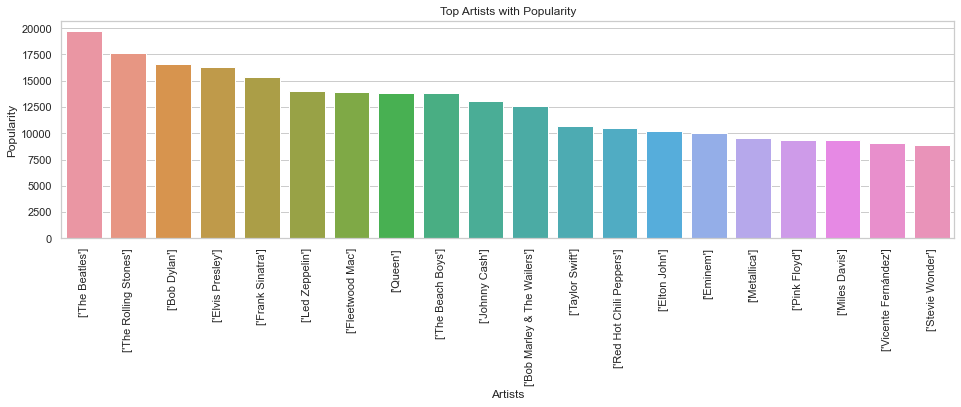

In [62]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = spotify_df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

Now Let's look at the time analysis of dataset.

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 17.19999999999999, 'Year')

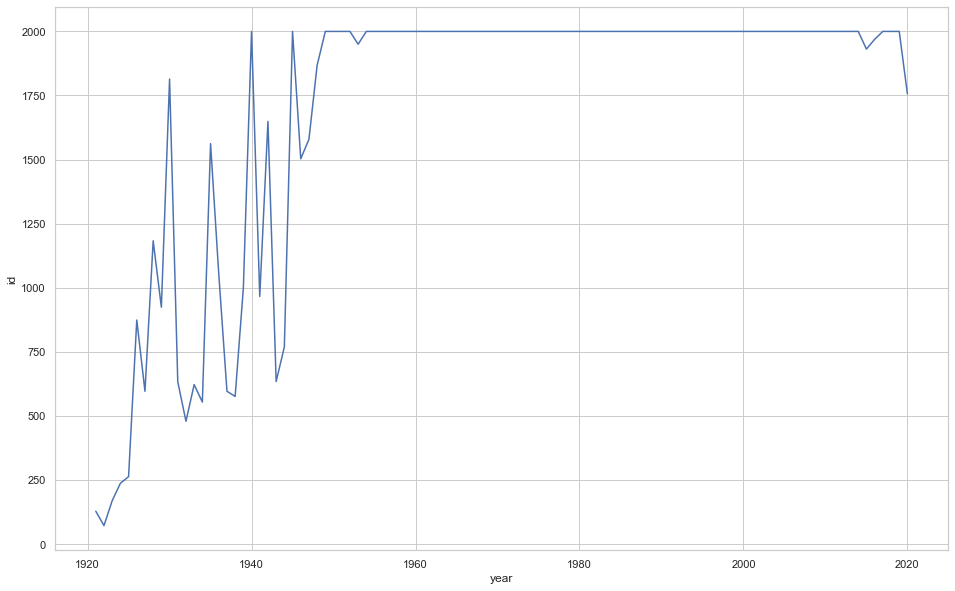

In [67]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
x = spotify_df.groupby("year")["id"].count()
axis = sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

In [68]:
import jovian


In [69]:
jovian.commit(project="Spotify-Data-analysis",file=["data.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suhasyogeesh/spotify-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suhasyogeesh/spotify-data-analysis


'https://jovian.ml/suhasyogeesh/spotify-data-analysis'

## Inferences and Conclusion
1. In this note book i have tried to analyze various trends on songs in spotify.
2. As iam a binge listener of songs in spotify i choose this dataset from kaggle.com.
3. While working on this project, i researched lot of information regarding pandas and plots.
4. After the analysis we concluded that spotify has n number of song collections with variety of artists based on trend.
5. While doing this project i have realized that there is lot more to learn, iam excited to move forward in this journey of   becoming a Data Analyst/Scientist.
6. I have refered to the pandas notebook and visulization notes from zero to pandas project to finish this project, i have done lot research as well to the learn th concepts of pandas and numpy.

## References and Future Work
1. https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks(link to the dataset)
2. Numerical computing with Numpy: https://jovian.ml/aakashns/python-numerical-computing-with-numpy
3. Analyzing tabular data with Pandas: https://jovian.ml/aakashns/python-pandas-data-analysis
4. Matplotlib & Seaborn tutorial: https://jovian.ml/aakashns/python-matplotlib-data-visualization
5. Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
5. Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
6. Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [70]:
import jovian

In [71]:
jovian.commit(project="Spotify-Data-analysis",file=["data.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suhasyogeesh/spotify-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suhasyogeesh/spotify-data-analysis


'https://jovian.ml/suhasyogeesh/spotify-data-analysis'